# Project Team B EDA Analysis

In [1]:
import pandas as pd
import datetime as dt
import json
import ast
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies_clean.csv')

In [3]:
movies.head()

,index,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count
0,0,False,30000000,"['Animation', 'Comedy', 'Family']",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0
1,1,False,65000000,"['Adventure', 'Fantasy', 'Family']",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0
2,2,False,0,"['Romance', 'Comedy']",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0
3,3,False,16000000,"['Comedy', 'Drama', 'Romance']",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0
4,4,False,0,['Comedy'],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0


1. which are the top 10 movies of all time?

In [4]:
movies = movies[movies['vote_average'] > 0]

In [5]:
movies["weighted_score"] = movies["vote_average"] * movies["vote_count"]

In [6]:
movies["weighted_score"] 

0        41695.5
1        16649.7
2          598.0
3          207.4
4          986.1
          ...   
44342        7.0
44343        3.5
44344      148.2
44345       27.0
44346       22.8
Name: weighted_score, Length: 41621, dtype: float64

In [7]:
movies["normalized_weighted_score"] = ((movies["weighted_score"] - movies["weighted_score"].min()) \
                                  / (movies["weighted_score"].max() - movies["weighted_score"].min()))* 100 


In [8]:
movies.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,weighted_score,normalized_weighted_score
count,41621.000000,4.162100e+04,41621.000000,41621.000000,4.162100e+04,41621.000000,41621.000000,41621.000000,41621.000000,41621.000000
mean,22065.962351,4.606090e+06,100697.262584,3.163910,1.224040e+07,96.153408,6.016891,119.812498,800.720531,0.701905
std,13115.142041,1.816062e+07,108876.341169,6.210395,6.713986e+07,37.008809,1.248262,512.321101,3690.381103,3.236978
min,0.000000,0.000000e+00,2.000000,0.000001,0.000000e+00,0.000000,0.500000,1.000000,0.500000,0.000000
25%,10644.000000,0.000000e+00,24221.000000,0.499595,0.000000e+00,86.000000,5.300000,4.000000,24.000000,0.020613
50%,21647.000000,0.000000e+00,53624.000000,1.304562,0.000000e+00,95.000000,6.100000,11.000000,67.100000,0.058417
75%,33316.000000,0.000000e+00,135990.000000,4.229239,0.000000e+00,107.000000,6.900000,39.000000,241.500000,0.211391
max,45463.000000,3.800000e+08,464207.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,114007.500000,100.000000


In [9]:
movies.sort_values(by = 'normalized_weighted_score', ascending = False).head(20)

,index,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,status,title,video,vote_average,vote_count,weighted_score,normalized_weighted_score
15398,15480,False,160000000,"['Action', 'Thriller', 'Science Fiction', 'Mys...",27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",29.108149,...,2010-07-14,8.255328e+08,148.0,Released,Inception,False,8.1,14075.0,114007.5,100.000000
12436,12481,False,185000000,"['Drama', 'Action', 'Crime', 'Thriller']",155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,123.167259,...,2008-07-16,1.004558e+09,152.0,Released,The Dark Knight,False,8.3,12269.0,101832.7,89.321007
22639,22879,False,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,tt0816692,en,Interstellar,Interstellar chronicles the adventures of a gr...,32.213481,...,2014-11-05,6.751200e+08,169.0,Released,Interstellar,False,8.1,11187.0,90614.7,79.481260
17692,17818,False,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,2012-04-25,1.519558e+09,143.0,Released,The Avengers,False,7.4,12000.0,88800.0,77.889516
14483,14551,False,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,...,2009-12-10,2.787965e+09,162.0,Released,Avatar,False,7.2,12114.0,87220.8,76.504337
26243,26564,False,58000000,"['Action', 'Adventure', 'Comedy']",293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,187.860492,...,2016-02-09,7.831130e+08,108.0,Released,Deadpool,False,7.4,11444.0,84685.6,74.280614
2820,2843,False,63000000,['Drama'],550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,63.869599,...,1999-10-15,1.008538e+08,139.0,Released,Fight Club,False,8.3,9678.0,80327.4,70.457867
19882,20051,False,100000000,"['Drama', 'Western']",68718,tt1853728,en,Django Unchained,"With the help of a German bounty hunter, a fre...",19.785025,...,2012-12-25,4.253682e+08,165.0,Released,Django Unchained,False,7.8,10297.0,80316.6,70.448394
23499,23753,False,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,tt2015381,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",53.291601,...,2014-07-30,7.733286e+08,121.0,Released,Guardians of the Galaxy,False,7.9,10014.0,79110.6,69.390564
290,292,False,8000000,"['Thriller', 'Crime']",680,tt0110912,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",140.950236,...,1994-09-10,2.139288e+08,154.0,Released,Pulp Fiction,False,8.3,8670.0,71961.0,63.119370


In [10]:
movies['net'] = movies['revenue'] - movies['budget']

In [11]:
movies_top10 = movies.sort_values(by = 'normalized_weighted_score', ascending = False).head(10)

In [12]:
movies_top10

,index,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,status,title,video,vote_average,vote_count,weighted_score,normalized_weighted_score,net
15398,15480,False,160000000,"['Action', 'Thriller', 'Science Fiction', 'Mys...",27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",29.108149,...,8.255328e+08,148.0,Released,Inception,False,8.1,14075.0,114007.5,100.000000,6.655328e+08
12436,12481,False,185000000,"['Drama', 'Action', 'Crime', 'Thriller']",155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,123.167259,...,1.004558e+09,152.0,Released,The Dark Knight,False,8.3,12269.0,101832.7,89.321007,8.195584e+08
22639,22879,False,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,tt0816692,en,Interstellar,Interstellar chronicles the adventures of a gr...,32.213481,...,6.751200e+08,169.0,Released,Interstellar,False,8.1,11187.0,90614.7,79.481260,5.101200e+08
17692,17818,False,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,1.519558e+09,143.0,Released,The Avengers,False,7.4,12000.0,88800.0,77.889516,1.299558e+09
14483,14551,False,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,...,2.787965e+09,162.0,Released,Avatar,False,7.2,12114.0,87220.8,76.504337,2.550965e+09
26243,26564,False,58000000,"['Action', 'Adventure', 'Comedy']",293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,187.860492,...,7.831130e+08,108.0,Released,Deadpool,False,7.4,11444.0,84685.6,74.280614,7.251130e+08
2820,2843,False,63000000,['Drama'],550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,63.869599,...,1.008538e+08,139.0,Released,Fight Club,False,8.3,9678.0,80327.4,70.457867,3.785375e+07
19882,20051,False,100000000,"['Drama', 'Western']",68718,tt1853728,en,Django Unchained,"With the help of a German bounty hunter, a fre...",19.785025,...,4.253682e+08,165.0,Released,Django Unchained,False,7.8,10297.0,80316.6,70.448394,3.253682e+08
23499,23753,False,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,tt2015381,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",53.291601,...,7.733286e+08,121.0,Released,Guardians of the Galaxy,False,7.9,10014.0,79110.6,69.390564,6.033286e+08
290,292,False,8000000,"['Thriller', 'Crime']",680,tt0110912,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",140.950236,...,2.139288e+08,154.0,Released,Pulp Fiction,False,8.3,8670.0,71961.0,63.119370,2.059288e+08


In [13]:
movies.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,weighted_score,normalized_weighted_score,net
count,41621.000000,4.162100e+04,41621.000000,41621.000000,4.162100e+04,41621.000000,41621.000000,41621.000000,41621.000000,41621.000000,4.162100e+04
mean,22065.962351,4.606090e+06,100697.262584,3.163910,1.224040e+07,96.153408,6.016891,119.812498,800.720531,0.701905,7.634310e+06
std,13115.142041,1.816062e+07,108876.341169,6.210395,6.713986e+07,37.008809,1.248262,512.321101,3690.381103,3.236978,5.444629e+07
min,0.000000,0.000000e+00,2.000000,0.000001,0.000000e+00,0.000000,0.500000,1.000000,0.500000,0.000000,-1.657101e+08
25%,10644.000000,0.000000e+00,24221.000000,0.499595,0.000000e+00,86.000000,5.300000,4.000000,24.000000,0.020613,0.000000e+00
50%,21647.000000,0.000000e+00,53624.000000,1.304562,0.000000e+00,95.000000,6.100000,11.000000,67.100000,0.058417,0.000000e+00
75%,33316.000000,0.000000e+00,135990.000000,4.229239,0.000000e+00,107.000000,6.900000,39.000000,241.500000,0.211391,0.000000e+00
max,45463.000000,3.800000e+08,464207.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,114007.500000,100.000000,2.550965e+09


are the popular movies also profitable? (yes) which top10 movies made more than half a million net . is wighted score a good predictor of monetary success?

<AxesSubplot:xlabel='normalized_weighted_score', ylabel='net'>

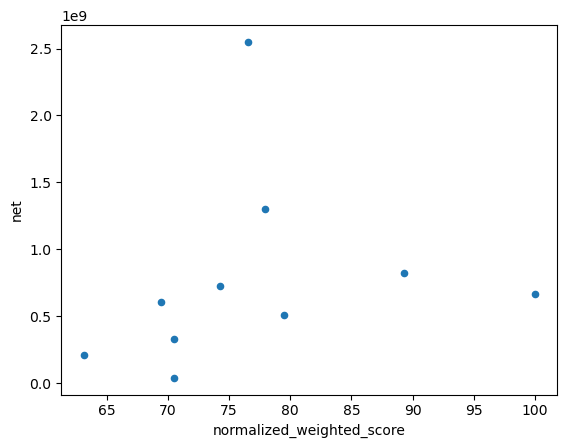

In [14]:
movies_top10.plot('normalized_weighted_score', 'net', kind = 'scatter')

In [15]:
movies_top100 = movies.sort_values(by = 'normalized_weighted_score', ascending = False).head(100)

<AxesSubplot:xlabel='normalized_weighted_score', ylabel='net'>

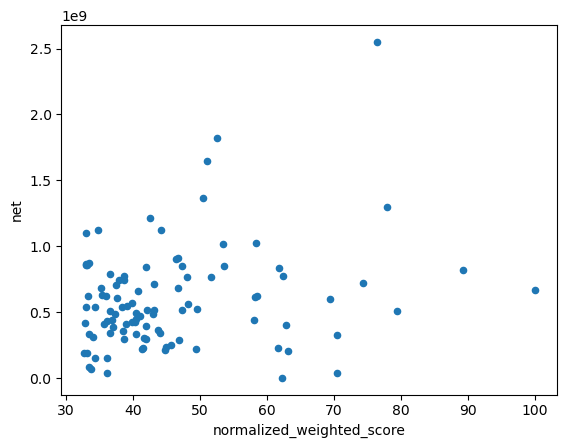

In [16]:
movies_top100.plot('normalized_weighted_score', 'net', kind = 'scatter')

In [17]:
movies.head(10)

,index,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,status,title,video,vote_average,vote_count,weighted_score,normalized_weighted_score,net
0,0,False,30000000,"['Animation', 'Comedy', 'Family']",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0,41695.5,36.572316,343554033.0
1,1,False,65000000,"['Adventure', 'Fantasy', 'Family']",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0,16649.7,14.603665,197797249.0
2,2,False,0,"['Romance', 'Comedy']",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0,598.0,0.524091,0.0
3,3,False,16000000,"['Comedy', 'Drama', 'Romance']",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0,207.4,0.181480,65452156.0
4,4,False,0,['Comedy'],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0,986.1,0.864508,76578911.0
5,5,False,60000000,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,...,187436818.0,170.0,Released,Heat,False,7.7,1886.0,14522.2,12.737551,127436818.0
6,6,False,58000000,"['Comedy', 'Romance']",11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,...,0.0,127.0,Released,Sabrina,False,6.2,141.0,874.2,0.766356,-58000000.0
7,7,False,0,"['Action', 'Adventure', 'Drama', 'Family']",45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,...,0.0,97.0,Released,Tom and Huck,False,5.4,45.0,243.0,0.212706,0.0
8,8,False,35000000,"['Action', 'Adventure', 'Thriller']",9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,...,64350171.0,106.0,Released,Sudden Death,False,5.5,174.0,957.0,0.838984,29350171.0
9,9,False,58000000,"['Adventure', 'Action', 'Thriller']",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,...,352194034.0,130.0,Released,GoldenEye,False,6.6,1194.0,7880.4,6.911769,294194034.0


Which are the top 10 movies with the highest Return on Investment (ROI)?

In [18]:
# Ο δείκτης ROI (Return on Investment) μετρά το ποσοστό του κέρδους σε σχέση με το επενδυθέν κεφάλαιο
# Ο ROI είναι ένας πολύ χρήσιμος δείκτης για να αξιολογηθεί η απόδοση μιας επένδυσης,
# καθώς επιτρέπει τη σύγκριση διαφόρων επενδύσεων ανεξάρτητα από το μέγεθος τους.
# (ROI = (Revenue - Budget) / Budget * 100)
ποια ταινια ειχε την μεγαλυτερη κερδοφορια με βαση το ρισκο τουε 
# ειναι ενασ βασικος δεικτης αποδησης,ειναι ενασ δεικτης που προδδιοριζει την κερδοφιαρια μιας επενσυσης της επιχ

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41621 entries, 0 to 44346
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      41621 non-null  int64  
 1   adult                      41621 non-null  bool   
 2   budget                     41621 non-null  int64  
 3   genres                     41621 non-null  object 
 4   id                         41621 non-null  int64  
 5   imdb_id                    41621 non-null  object 
 6   original_language          41621 non-null  object 
 7   original_title             41621 non-null  object 
 8   overview                   41621 non-null  object 
 9   popularity                 41621 non-null  float64
 10  production_companies       41621 non-null  object 
 11  production_countries       41621 non-null  object 
 12  release_date               41621 non-null  object 
 13  revenue                    41621 non-null  flo

In [41]:
movies_roi=movies[movies["budget"].notnull() & (movies["budget"] > 10000)& (movies["revenue"]>1000)]


# calculate ROI
movies_roi["ROI"] = 100*((movies_roi["revenue"] - movies_roi["budget"]) / movies_roi["budget"])
movies=movies_roi

In [35]:
movies_roi["ROI"]

0        1145.180110
1         304.303460
3         409.075975
5         212.394697
8          83.857631
            ...     
44066    1579.729136
44145      58.333333
44295      66.076500
44297     -36.560350
44307     -71.740000
Name: ROI, Length: 5290, dtype: float64

In [22]:
movies_roi.sort_values(by="ROI", ascending=False)[["ROI","original_title","revenue","budget"]].head(10)

,ROI,original_title,revenue,budget
14125,1.288939e+06,Paranormal Activity,193355800.0,15000
2572,4.132333e+05,The Blair Witch Project,248000000.0,60000
4290,6.528462e+04,猛龍過江,85000000.0,130000
2225,4.990000e+04,Pink Flamingos,6000000.0,12000
7755,4.386166e+04,Super Size Me,28575078.0,65000
31113,4.256441e+04,The Gallows,42664410.0,100000
9423,4.195227e+04,Open Water,54667954.0,130000
2323,3.620471e+04,The Texas Chain Saw Massacre,30859000.0,85000
1888,3.107100e+04,Bambi,267447150.0,858000
925,2.621579e+04,Night of the Living Dead,30000000.0,114000


C:\Users\athin\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29467 (\N{CJK UNIFIED IDEOGRAPH-731B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\athin\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\athin\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36942 (\N{CJK UNIFIED IDEOGRAPH-904E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\athin\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


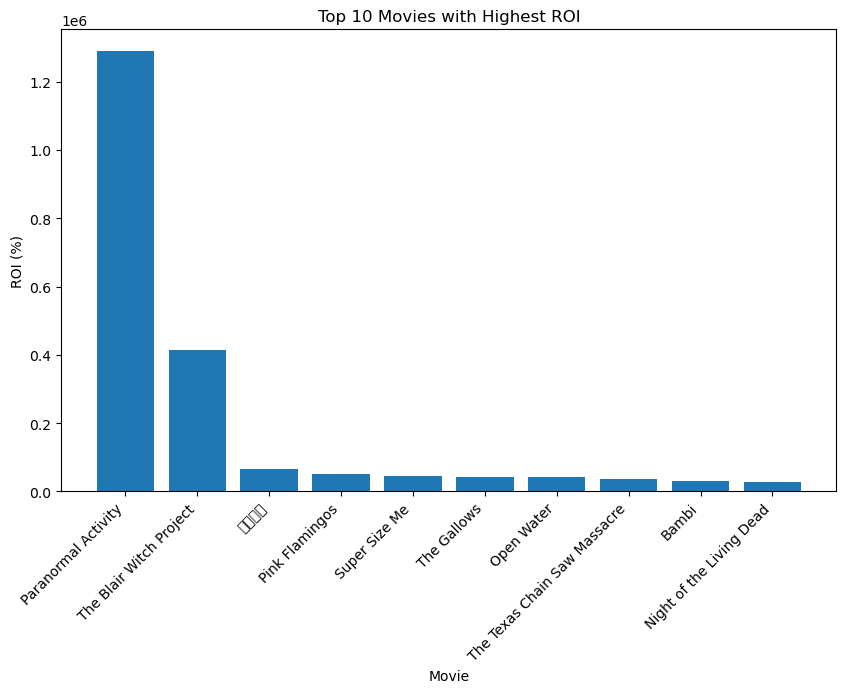

In [36]:
top_10_roi_movies = movies_roi.sort_values(by="ROI", ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_10_roi_movies["original_title"], top_10_roi_movies["ROI"])
plt.xlabel('Movie')
plt.ylabel('ROI (%)')
plt.title('Top 10 Movies with Highest ROI')
plt.xticks(rotation=45, ha="right")  
plt.show()

C:\Users\athin\AppData\Local\Temp\ipykernel_16588\2603978744.py:17: UserWarning: Glyph 29467 (\N{CJK UNIFIED IDEOGRAPH-731B}) missing from current font.
  plt.savefig('top_10_roi_movies_plot.png', bbox_inches='tight')
C:\Users\athin\AppData\Local\Temp\ipykernel_16588\2603978744.py:17: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  plt.savefig('top_10_roi_movies_plot.png', bbox_inches='tight')
C:\Users\athin\AppData\Local\Temp\ipykernel_16588\2603978744.py:17: UserWarning: Glyph 36942 (\N{CJK UNIFIED IDEOGRAPH-904E}) missing from current font.
  plt.savefig('top_10_roi_movies_plot.png', bbox_inches='tight')
C:\Users\athin\AppData\Local\Temp\ipykernel_16588\2603978744.py:17: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from current font.
  plt.savefig('top_10_roi_movies_plot.png', bbox_inches='tight')
C:\Users\athin\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29467 (\N{CJK UNIFIED IDEOGRAPH-7

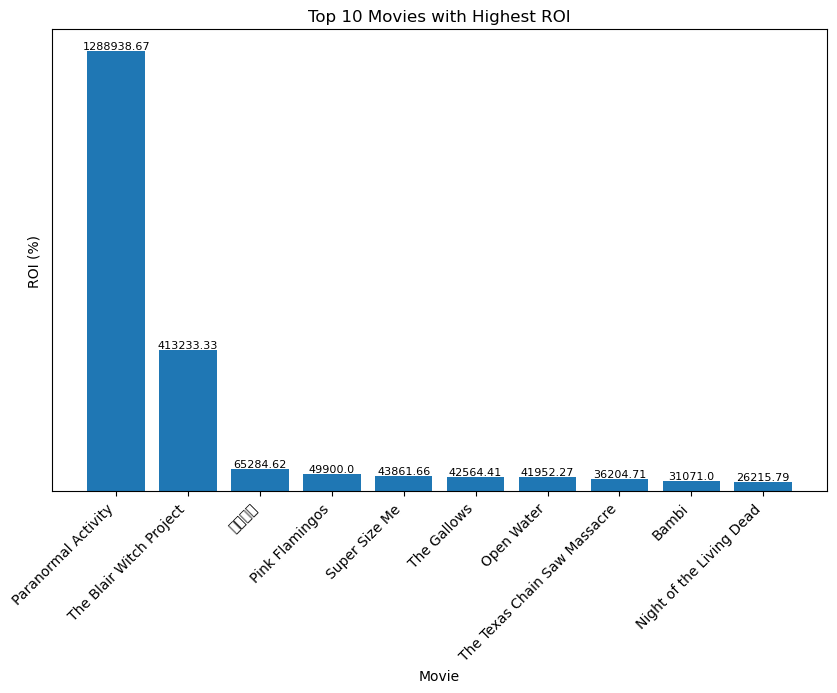

In [37]:
top_10_roi_movies = movies_roi.sort_values(by="ROI", ascending=False).head(10)

# Plotting the bar chart with ROI values on top
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_roi_movies["original_title"], top_10_roi_movies["ROI"])
plt.xlabel('Movie')
plt.ylabel('ROI (%)')
plt.title('Top 10 Movies with Highest ROI')
plt.xticks(rotation=45, ha="right")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)


plt.yticks([])
plt.savefig('top_10_roi_movies_plot.png', bbox_inches='tight')

plt.show()


2)

In [38]:
top_10_roi_movies.head(50)

,index,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,status,title,video,vote_average,vote_count,weighted_score,normalized_weighted_score,net,ROI
14125,14192,False,15000,"['Horror', 'Mystery']",23827,tt1179904,en,Paranormal Activity,"After a young, middle class couple moves into ...",12.706424,...,86.0,Released,Paranormal Activity,False,5.9,1351.0,7970.9,6.991150,193340800.0,1.288939e+06
2572,2595,False,60000,"['Horror', 'Mystery']",2667,tt0185937,en,The Blair Witch Project,In October of 1994 three student filmmakers di...,14.838386,...,81.0,Released,The Blair Witch Project,False,6.3,1090.0,6867.0,6.022876,247940000.0,4.132333e+05
4290,4316,False,130000,"['Action', 'Crime']",9462,tt0068935,cn,猛龍過江,Tang Lung arrives in Rome to help his cousins ...,11.116474,...,100.0,Released,The Way of the Dragon,False,7.4,235.0,1739.0,1.524906,84870000.0,6.528462e+04
2225,2248,False,12000,"['Horror', 'Comedy', 'Crime']",692,tt0069089,en,Pink Flamingos,Notorious Baltimore criminal and underground f...,5.738871,...,93.0,Released,Pink Flamingos,False,6.2,111.0,688.2,0.603209,5988000.0,4.990000e+04
7755,7788,False,65000,"['Documentary', 'Comedy', 'Drama']",9372,tt0390521,en,Super Size Me,Morgan Spurlock subjects himself to a diet bas...,5.266103,...,100.0,Released,Super Size Me,False,6.6,520.0,3432.0,3.009903,28510078.0,4.386166e+04
31113,31628,False,100000,"['Horror', 'Thriller']",299245,tt2309260,en,The Gallows,20 years after a horrific accident during a sm...,7.515050,...,87.0,Released,The Gallows,False,4.9,370.0,1813.0,1.589815,42564410.0,4.256441e+04
9423,9461,False,130000,"['Drama', 'Thriller']",83,tt0374102,en,Open Water,Two divers are left out at sea without a boat....,10.652818,...,79.0,Released,Open Water,False,5.3,320.0,1696.0,1.487189,54537954.0,4.195227e+04
2323,2346,False,85000,['Horror'],30497,tt0072271,en,The Texas Chain Saw Massacre,Five friends visiting their grandfather's hous...,15.526413,...,83.0,Released,The Texas Chain Saw Massacre,False,7.1,617.0,4380.7,3.842045,30774000.0,3.620471e+04
1888,1909,False,858000,"['Animation', 'Drama', 'Family']",3170,tt0034492,en,Bambi,Bambi's tale unfolds from season to season as ...,13.698132,...,70.0,Released,Bambi,False,6.8,1450.0,9860.0,8.648153,266589150.0,3.107100e+04
925,941,False,114000,['Horror'],10331,tt0063350,en,Night of the Living Dead,A group of people try to survive an attack of ...,14.384198,...,96.0,Released,Night of the Living Dead,False,7.5,591.0,4432.5,3.887481,29886000.0,2.621579e+04


In [39]:
movies_explode = movies.explode('genres')
movies_explode

,index,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,status,title,video,vote_average,vote_count,weighted_score,normalized_weighted_score,net,ROI
0,0,False,30000000,"['Animation', 'Comedy', 'Family']",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,Released,Toy Story,False,7.7,5415.0,41695.5,36.572316,343554033.0,1145.180110
1,1,False,65000000,"['Adventure', 'Fantasy', 'Family']",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,Released,Jumanji,False,6.9,2413.0,16649.7,14.603665,197797249.0,304.303460
3,3,False,16000000,"['Comedy', 'Drama', 'Romance']",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,127.0,Released,Waiting to Exhale,False,6.1,34.0,207.4,0.181480,65452156.0,409.075975
5,5,False,60000000,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,...,170.0,Released,Heat,False,7.7,1886.0,14522.2,12.737551,127436818.0,212.394697
8,8,False,35000000,"['Action', 'Adventure', 'Thriller']",9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,...,106.0,Released,Sudden Death,False,5.5,174.0,957.0,0.838984,29350171.0,83.857631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44066,45167,False,11000000,"['Action', 'Crime', 'Mystery', 'Thriller']",395834,tt5362988,en,Wind River,An FBI agent teams with the town's veteran gam...,40.796775,...,111.0,Released,Wind River,False,7.4,181.0,1339.4,1.174402,173770205.0,1579.729136
44145,45250,False,12000000,"['Action', 'Comedy', 'Drama']",24049,tt0479751,ta,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,...,185.0,Released,Sivaji: The Boss,False,6.9,25.0,172.5,0.150868,7000000.0,58.333333
44295,45409,False,800000,"['Comedy', 'Drama']",62757,tt0933361,en,Dikari,"The sea, August, interesting and simple people...",0.903061,...,100.0,Released,Savages,False,5.8,6.0,34.8,0.030086,528612.0,66.076500
44297,45412,False,2000000,"['Romance', 'Drama']",63281,tt1718881,en,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,...,107.0,Released,Pro Lyuboff,False,4.0,3.0,12.0,0.010087,-731207.0,-36.560350
